In [74]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report
import joblib

In [61]:
data=pd.read_csv("/content/heart_cleveland_upload.csv")
df=pd.DataFrame(data)
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [62]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [63]:
cat_col=df.select_dtypes(include="object").columns.to_list()
cat_col

[]

In [64]:
std=StandardScaler()
minx=MinMaxScaler()

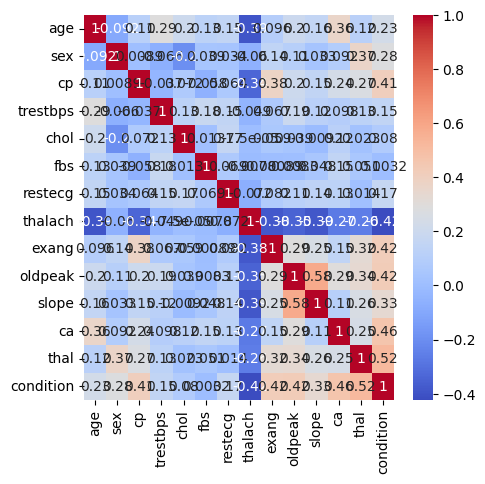

In [65]:
plt.figure(figsize=(5,5))
corr_mt=df.corr()
sns.heatmap(corr_mt,annot=True,cmap='coolwarm')
plt.show()

In [66]:
x=df.drop('condition',axis=1)
y=df['condition']

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(237, 13)

In [68]:
y_test.shape

(60,)

In [69]:
x_train_scaled=std.fit_transform(x_train)
x_test_scaled=std.transform(x_test)

In [70]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled,y_train)
lr_pred=lr.predict(x_test_scaled)

In [71]:
kn=KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train_scaled,y_train)
knn_pred=kn.predict(x_test_scaled)

In [72]:
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

print("\n--- KNN ---")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


--- Logistic Regression ---
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60


--- KNN ---
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.69      0.79      0.73        28

    accuracy                           0.73        60
   macro avg       0.74      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



In [76]:
joblib.dump(lr,'heart_model.pkl')


['heart_model.pkl']

In [77]:
joblib.dump(std,'scaler.pkl')

['scaler.pkl']

In [78]:
from google.colab import files
files.download('heart_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>